In [28]:
import os
import pandas as pd

import time
import datetime

In [4]:
csvfn = []
fns = os.listdir('./raw')

for file in fns:
    # check only text files
    if file.endswith('.csv'):
        csvfn.append(file)

In [5]:
csvfn

['hdd_photos.csv', 'iphone_map.csv', 'timeline.csv', 'pc_photos.csv']

In [19]:
n = 0
for fn in csvfn:
    if n:
        dfn = pd.read_csv(fn, index_col= False).sort_values(by='time')
        df = pd.concat([df, dfn])
    else:
        df = pd.read_csv(fn, index_col= False).sort_values(by='time')

    n+=1

In [24]:
dfw = df.drop(columns=['altitude']).sort_values(by='time').drop_duplicates()

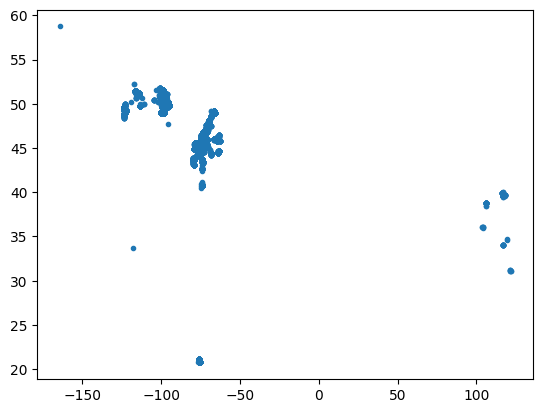

In [25]:
import matplotlib.pyplot  as plt

plt.plot(dfw['longitude'], dfw['latitude'],'.')

In [26]:
dfw.to_csv('footprint.csv', index=False)

In [27]:
dfw

,time,latitude,longitude
9565,2005:08:27 00:21:17,45.115333,-73.268500
18,2013:08:03 08:27:58,49.810333,-97.135167
19,2013:08:03 08:29:39,49.810333,-97.135167
20,2013:08:03 08:29:45,49.810333,-97.135333
21,2013:08:03 11:02:20,49.810333,-97.136333
...,...,...,...
116,2023:11:25 16:42:39,45.478672,-73.660217
124,2023:11:25 16:42:40,45.478703,-73.660217
133,2023:11:25 17:51:43,45.478611,-73.660356
140,2023:11:25 17:52:13,45.478611,-73.660356


In [64]:
date_format = "%Y:%m:%d %H:%M:%S"
date_format2 = "%Y-%m-%dT%H:%M:%S.%fZ"
print(dfw.iloc[1840,0])
print(time.mktime(datetime.datetime.strptime(dfw.iloc[1840,0],
                                            date_format2).timetuple()))

2017-01-08T16:43:54.455Z
1483911834.0


In [33]:
dfw.iloc[0,0]

'2005:08:27 00:21:17'

In [48]:
dfw['timestamp'] = 0

19282

In [66]:
for n in range(dfw.shape[0]):
    try:
        dfw.iloc[n,3] = int(time.mktime(datetime.datetime.strptime(dfw.iloc[n,0], date_format).timetuple()))
    except:
        # print(n)
        dfw.iloc[n,3] = int(time.mktime(datetime.datetime.strptime(dfw.iloc[n,0], date_format2).timetuple()))

In [68]:
dfw.to_csv('footprint.csv', index=False)